In [28]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from skactiveml.regressor.estimator._ngke import NormalGammaKernelEstimator
from skactiveml.utils import check_random_state
from skactiveml.regression._reg_xpal import RegxPal
from skactiveml.regressor._nwr import NWR
from skactiveml.regressor._wrapper import SklearnRegressor
from skactiveml.utils import unlabeled_indices
from sklearn.ensemble import RandomForestRegressor

In [21]:
def make_non_linear_regression(interval, function, density, deviation, n_samples,
                    random_state=None, n_mc_samples=10):

    random_state = check_random_state(random_state)
    a = interval[0]
    b = interval[1]

    samples = (b-a)*random_state.random_sample((n_samples, n_mc_samples)) + a
    mc_indices = np.zeros(n_samples, dtype=int)
    K = np.zeros((n_samples, n_mc_samples))
    for i, j in itertools.product(range(n_samples), range(n_mc_samples)):
        K[i, j] = density(samples[i, j])
    for i in range(n_samples):
        p = K[i]/np.sum(K[i]) if np.sum(K[i]) != 0 else None
        mc_indices[i] = random_state.choice(n_mc_samples, p=p)
    X = samples[np.arange(n_samples), mc_indices]
    y = np.zeros(n_samples)
    for i, x in enumerate(X):
        y[i] = random_state.normal(function(x), deviation(x))

    return X, y

def high_at_border(interval, scalar=1):
    a = interval[0]
    b = interval[1]
    norm = 1 if a + b == 0 else np.abs(a+b)
    def noise(x):
        return 1/2*np.abs(x-1/2*(a+b))/norm
    return noise

def high_at_center(interval, scalar=1):
    a = interval[0]
    b = interval[1]
    norm = 1 if a + b == 0 else np.abs(a+b)
    def noise(x):
        return 1-1/2*np.abs(x-1/2*(a+b))/norm
    return noise

def base_function(x, epsilon=0.1):
    noise = (np.array(x > 0, dtype=int) + np.array(x < 0.5, dtype=int) - 1)*np.random.normal(scale=0.1)
    return np.sin(x)

In [22]:
interval = [-2, 2]
a, b = interval
x = np.linspace(a, b, 100)

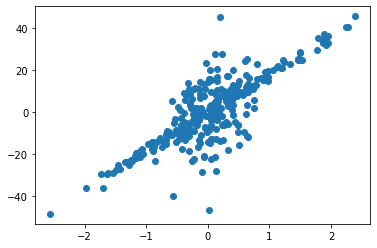

TypeError: 'numpy.ndarray' object is not callable

In [27]:
X = np.linspace(-1, 1, 100)
y_true = base_function(X)
estimator = NormalGammaKernelEstimator(metric_dict={'gamma': 10.0}, lmbda_0=10.0,
                                       beta_0=1.1, alpha_0=10.0)
qs = RegxPal(random_state=0, )

reg = NWR(metric_dict={'gamma': 10.0})
reg = SklearnRegressor(estimator=LinearRegression())

X = X_test
y = np.nan * y_test
E = X

for i in range(20):
    unlabeled_idx = unlabeled_indices(y)
    X_cand = X[unlabeled_idx]
    cand_indices, utilities = qs.query(X_cand.reshape(-1, 1), reg, E.reshape(-1, 1), X.reshape(-1, 1),
                                                y, batch_size=1, assume_linear=True, return_utilities=True)
    query_indices = unlabeled_idx[cand_indices]
    y[query_indices] = y_test[query_indices]
    reg.fit(X, y)

    plt.scatter(X_cand, utilities)
    plt.show()

    y_pred = reg.predict(X_cand.reshape(-1, 1))
    
    plt.scatter(X_test, y_test)
    plt.scatter(X_cand, y_pred)
    plt.scatter(X[~np.isnan(y)], y[~np.isnan(y)])
    plt.show()

In [5]:
print()